In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as nb
from sklearn.linear_model import LinearRegression


### Data pre-processing

In [2]:
df = pd.read_csv("FPT Historical Data-reality.csv")

In [3]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,06/20/2024,"133,500.0","135,000.0","135,700.0","131,800.0",9.84M,1.52%
1,06/19/2024,"131,500.0","128,000.0","132,800.0","126,600.0",9.67M,2.73%
2,06/18/2024,"128,000.0","128,800.0","129,700.0","128,000.0",6.68M,-0.62%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3 non-null      object
 1   Price     3 non-null      object
 2   Open      3 non-null      object
 3   High      3 non-null      object
 4   Low       3 non-null      object
 5   Vol.      3 non-null      object
 6   Change %  3 non-null      object
dtypes: object(7)
memory usage: 300.0+ bytes


In [5]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,3,3,3,3,3,3,3
unique,3,3,3,3,3,3,3
top,06/20/2024,"133,500.0","135,000.0","135,700.0","131,800.0",9.84M,1.52%
freq,1,1,1,1,1,1,1


In [6]:
# Normalize the price, Open, High, Low
df.Price = df.Price.str.replace(',', '').astype(float)
df.Open = df.Open.str.replace(',', '').astype(float)
df.High = df.High.str.replace(',', '').astype(float)
df.Low = df.Low.str.replace(',', '').astype(float)


In [7]:
input_string = "4.79M"
input_string[0:-1]

'4.79'

In [8]:
def vol_replace(string_input):
    if string_input[-1] == "M":
        output = float(string_input[0:-1])*1000000
    elif string_input[-1] == "K":
        output = float(string_input[0:-1])*1000
    else:
        output = float(string_input)
    return output

df["Vol."] = df["Vol."].apply(vol_replace)

In [9]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,06/20/2024,133500.0,135000.0,135700.0,131800.0,9840000.0,1.52%
1,06/19/2024,131500.0,128000.0,132800.0,126600.0,9670000.0,2.73%
2,06/18/2024,128000.0,128800.0,129700.0,128000.0,6680000.0,-0.62%


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df["Change %"] = df["Change %"].str.replace('%', '').astype(float)/100

In [12]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-06-20,133500.0,135000.0,135700.0,131800.0,9840000.0,0.0152
1,2024-06-19,131500.0,128000.0,132800.0,126600.0,9670000.0,0.0273
2,2024-06-18,128000.0,128800.0,129700.0,128000.0,6680000.0,-0.0062


In [13]:
df = df.sort_values('Date', ascending=True).reset_index()

# Moving Average

## Simple Moving Average

Formula:

SMAj = (1/k) * ∑ (i=j-1 to j+k-1)Ai        

where,

SMAj = Simple Moving Average of jth window \
k = size of the window \
Ai = ith element of the set of observations 

In [14]:
def SMA(window_size, df_column):
    moving_average = df_column.rolling(window=window_size+1).mean()
    return moving_average

In [15]:
ma = SMA(4, df.Price)

In [16]:
ma

0   NaN
1   NaN
2   NaN
Name: Price, dtype: float64

In [17]:
# New colum SMA
df["SMA"] = ma

In [18]:
index = df.index.to_frame()
index[0]

0    0
1    1
2    2
Name: 0, dtype: int64

In [19]:
df.head()

,index,Date,Price,Open,High,Low,Vol.,Change %,SMA
0,2,2024-06-18,128000.0,128800.0,129700.0,128000.0,6680000.0,-0.0062,NaN
1,1,2024-06-19,131500.0,128000.0,132800.0,126600.0,9670000.0,0.0273,NaN
2,0,2024-06-20,133500.0,135000.0,135700.0,131800.0,9840000.0,0.0152,NaN


In [20]:
df = df.fillna(0)

In [21]:
df

,index,Date,Price,Open,High,Low,Vol.,Change %,SMA
0,2,2024-06-18,128000.0,128800.0,129700.0,128000.0,6680000.0,-0.0062,0.0
1,1,2024-06-19,131500.0,128000.0,132800.0,126600.0,9670000.0,0.0273,0.0
2,0,2024-06-20,133500.0,135000.0,135700.0,131800.0,9840000.0,0.0152,0.0


In [22]:
# MAPE
mape_df = abs(df["Price"] - df["SMA"])/df["Price"]
mape = mape_df.mean()*100

In [23]:
mape

100.0

# Visualize 02 Columns Price and SMA to see how good it is

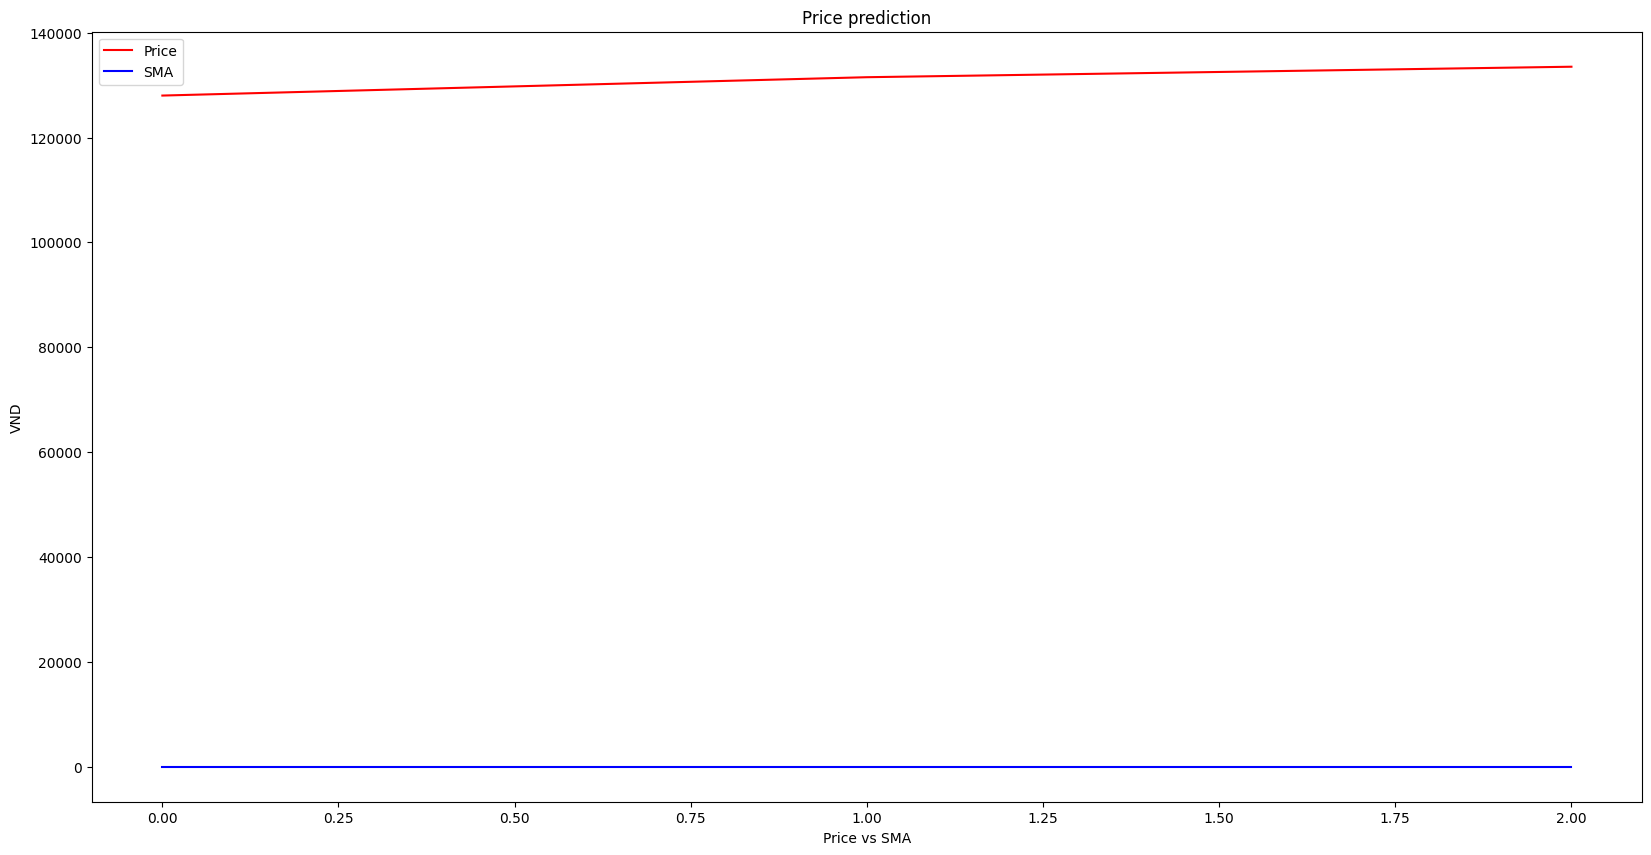

In [24]:
plt.figure(figsize=(20, 10))
plt.plot(df['Price'], color='red', label='Price')
plt.plot(df['SMA'], color='blue', label='SMA')
plt.title("Price prediction")
plt.xlabel("Price vs SMA")
plt.ylabel("VND")
plt.legend()

In [25]:
# Mean Absolute Percentage Error
mape = abs(df["Price"] - df["SMA"])*100/df["Price"]
mape = mape.mean()
mape

100.0

# Linear Regression

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   index     3 non-null      int64         
 1   Date      3 non-null      datetime64[ns]
 2   Price     3 non-null      float64       
 3   Open      3 non-null      float64       
 4   High      3 non-null      float64       
 5   Low       3 non-null      float64       
 6   Vol.      3 non-null      float64       
 7   Change %  3 non-null      float64       
 8   SMA       3 non-null      float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 348.0 bytes


In [27]:
# Convert 'Date' column to numeric values
df['Date'] = pd.to_numeric(df['Date'])

In [28]:
df['Date'].values.reshape(-1,1)

array([[1718668800000000000],
       [1718755200000000000],
       [1718841600000000000]], dtype=int64)

In [29]:
# Initialize a model
lm = LinearRegression()
X = df['Date'].values.reshape(-1, 1)
Y = df['Price'].values

In [30]:
lm.fit(X, Y)

LinearRegression()

In [31]:
Y_predict = lm.predict(X)

In [32]:
df["LinearRegression"] = Y_predict

In [33]:
x = [[1673913600000000099]]
yhat = lm.predict(x)

In [34]:
yhat

array([-1296250.])

In [35]:
df

,index,Date,Price,Open,High,Low,Vol.,Change %,SMA,LinearRegression
0,2,1718668800000000000,128000.0,128800.0,129700.0,128000.0,6680000.0,-0.0062,0.0,128250.0
1,1,1718755200000000000,131500.0,128000.0,132800.0,126600.0,9670000.0,0.0273,0.0,131000.0
2,0,1718841600000000000,133500.0,135000.0,135700.0,131800.0,9840000.0,0.0152,0.0,133750.0


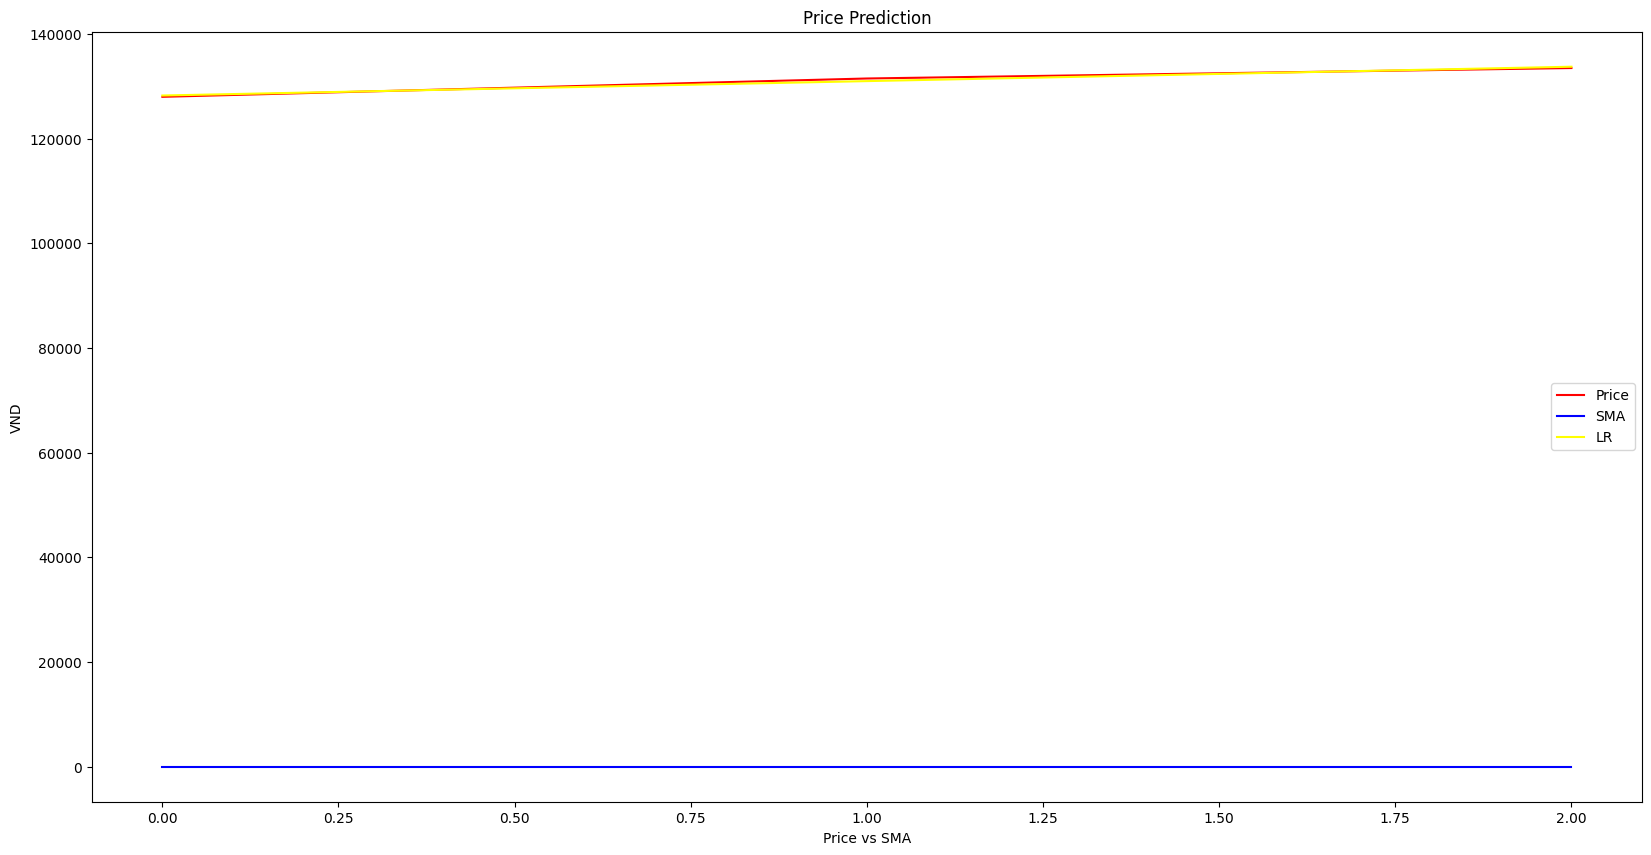

In [36]:
plt.figure(figsize=(20, 10))
plt.plot(df['Price'], color='red', label='Price')
plt.plot(df['SMA'], color='blue', label='SMA')
plt.plot(df['LinearRegression'], color='yellow', label='LR')

plt.title("Price Prediction")
plt.xlabel("Price vs SMA")
plt.ylabel("VND")
plt.legend()

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [38]:
mse = mean_squared_error(df["Price"], Y_predict)
mae = mean_absolute_error(df["Price"], Y_predict)
mape = mean_absolute_percentage_error(df["Price"], Y_predict)

In [39]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape*100}%")

Mean Squared Error: 125000.0
Mean Absolute Error: 333.3333333333333
Mean Absolute Percentage Error: 0.2542688514950418%


# Multiple Linear Regression

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             3 non-null      int64  
 1   Date              3 non-null      int64  
 2   Price             3 non-null      float64
 3   Open              3 non-null      float64
 4   High              3 non-null      float64
 5   Low               3 non-null      float64
 6   Vol.              3 non-null      float64
 7   Change %          3 non-null      float64
 8   SMA               3 non-null      float64
 9   LinearRegression  3 non-null      float64
dtypes: float64(8), int64(2)
memory usage: 372.0 bytes


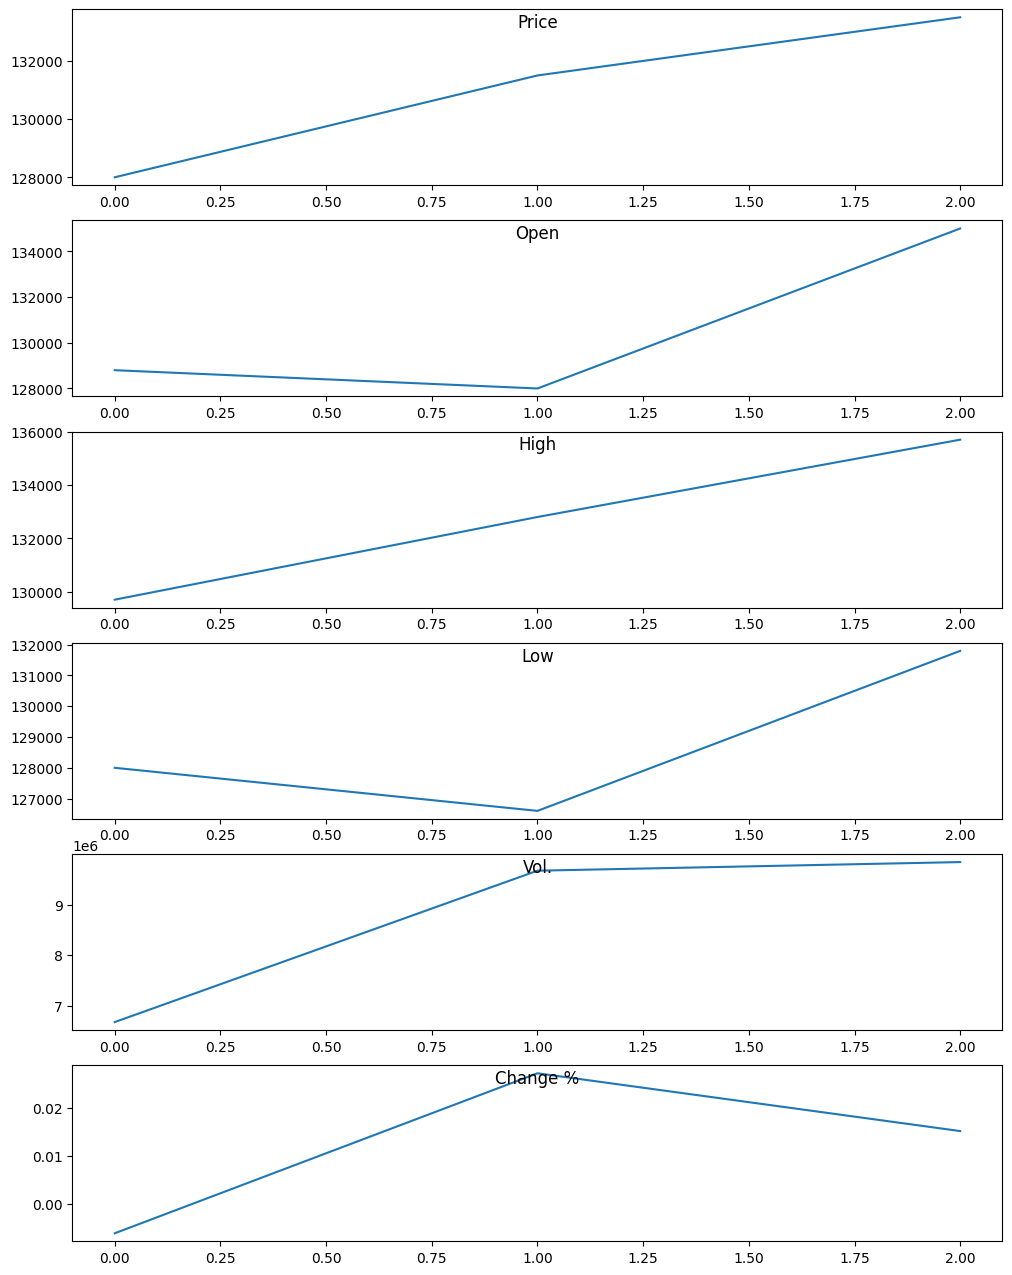

In [41]:
columns = ["Price", "Open", "High", "Low", "Vol.", "Change %"]
plt.figure(figsize = (12,16))
for i in range(len(columns)):
    plt.subplot(len(columns), 1, i+1)
    plt.plot(df[columns[i]])
    plt.title(columns[i], y=0.85, loc='center')
plt.show()

# Discuss on this, can we apply MLR?

## Create MLR model

In [42]:
# Initialize the model with Sklearn
mlr = LinearRegression()

In [43]:
# Define inputs (X) and target (Y)
input_columns = ["Open", "High", "Low", "Vol.", "Change %"]
target_column = "Price"
X = df[input_columns]
Y = df[target_column]

In [44]:
# Train the MLR model
mlr.fit(X, Y)

LinearRegression()

In [45]:
# Predict with the input_columns data
Y_predict = mlr.predict(X)

In [46]:
# Add the predict data into df, create new column named MLR
df["MLR"] = Y_predict

In [47]:
df.head()

,index,Date,Price,Open,High,Low,Vol.,Change %,SMA,LinearRegression,MLR
0,2,1718668800000000000,128000.0,128800.0,129700.0,128000.0,6680000.0,-0.0062,0.0,128250.0,128000.0
1,1,1718755200000000000,131500.0,128000.0,132800.0,126600.0,9670000.0,0.0273,0.0,131000.0,131500.0
2,0,1718841600000000000,133500.0,135000.0,135700.0,131800.0,9840000.0,0.0152,0.0,133750.0,133500.0


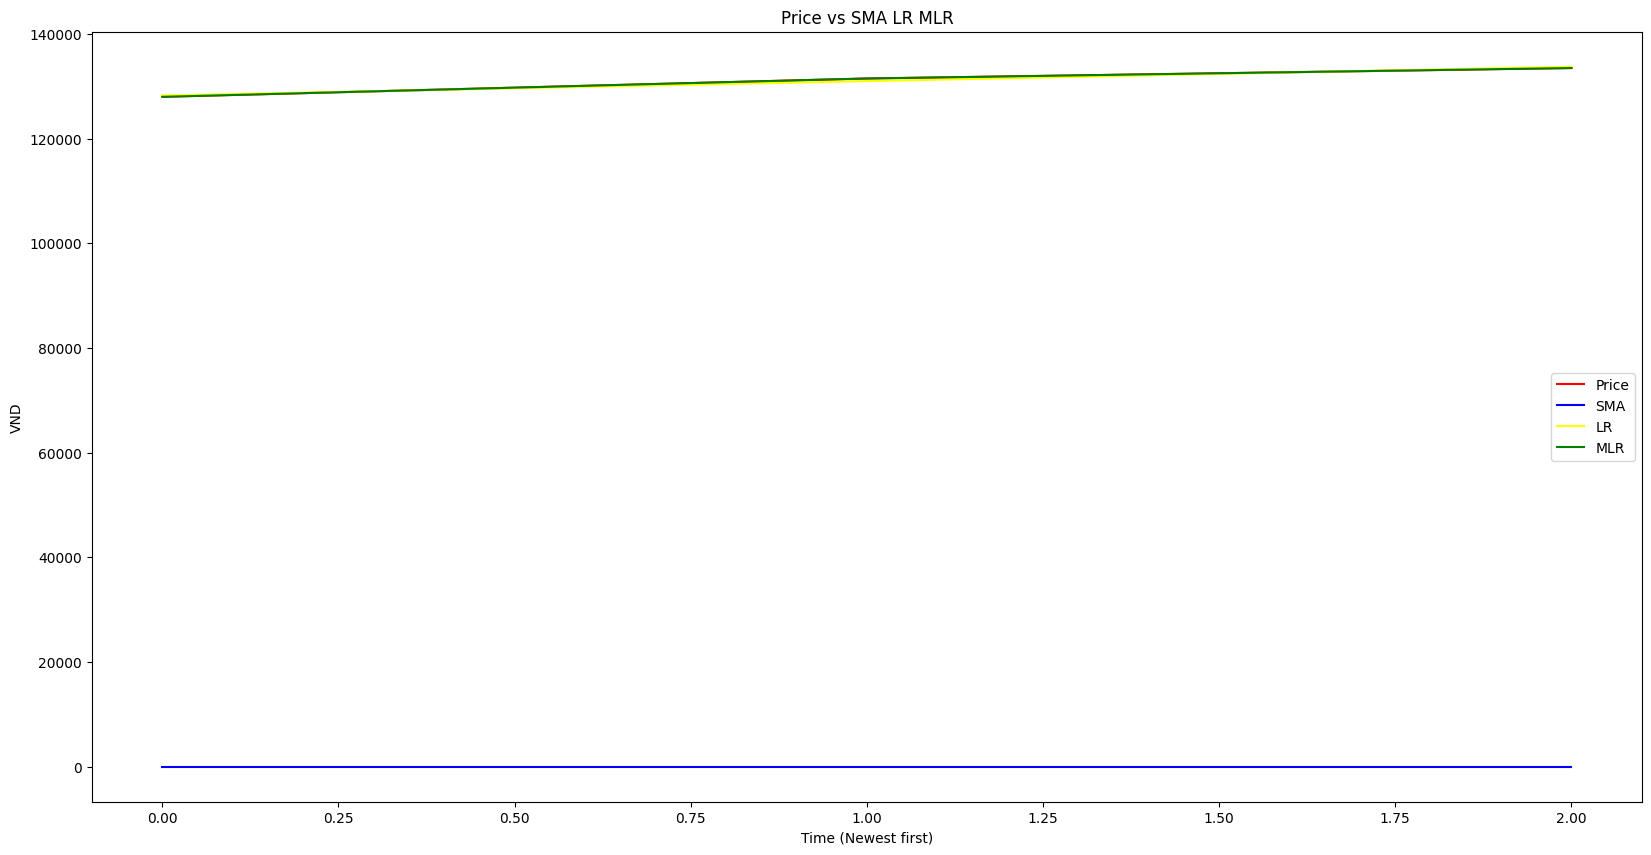

In [48]:
plt.figure(figsize=(20, 10))
plt.plot(df['Price'], color='red', label='Price')
plt.plot(df['SMA'], color='blue', label='SMA')
plt.plot(df['LinearRegression'], color='yellow', label='LR')
plt.plot(df['MLR'], color='green', label='MLR')
plt.title("Price vs SMA LR MLR")
plt.xlabel("Time (Newest first)")
plt.ylabel("VND")
plt.legend()

In [49]:
mape = mean_absolute_percentage_error(df["Price"], df["MLR"])*100
mape

4.475903520690919e-14

# Train, Test and Evaluation a model

In [50]:
# Define inputs (X) and target (Y)
input_columns = ["Open", "High", "Low", "Vol.", "Change %"]
target_column = "Price"
X = df[input_columns]
Y = df[target_column]

In [51]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=32)

In [52]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (2, 5)
X_test shape: (1, 5)
Y_train shape: (2,)
Y_test shape: (1,)


In [53]:
# Train with X_train, Y_train
mlr = LinearRegression()
mlr.fit(X_train, Y_train)

LinearRegression()

In [54]:
Yhat_train = mlr.predict(X_train)

In [55]:
mape = mean_absolute_percentage_error(Y_train, Yhat_train)*100
mape

0.0

In [56]:
# Predict with Test data
Yhat_test = mlr.predict(X_test)
mape_test = mean_absolute_percentage_error(Y_test, Yhat_test)*100
mape_test


1.3490675199803486

In [57]:
# Predict all data with this train and compare 
new_predict = mlr.predict(X)

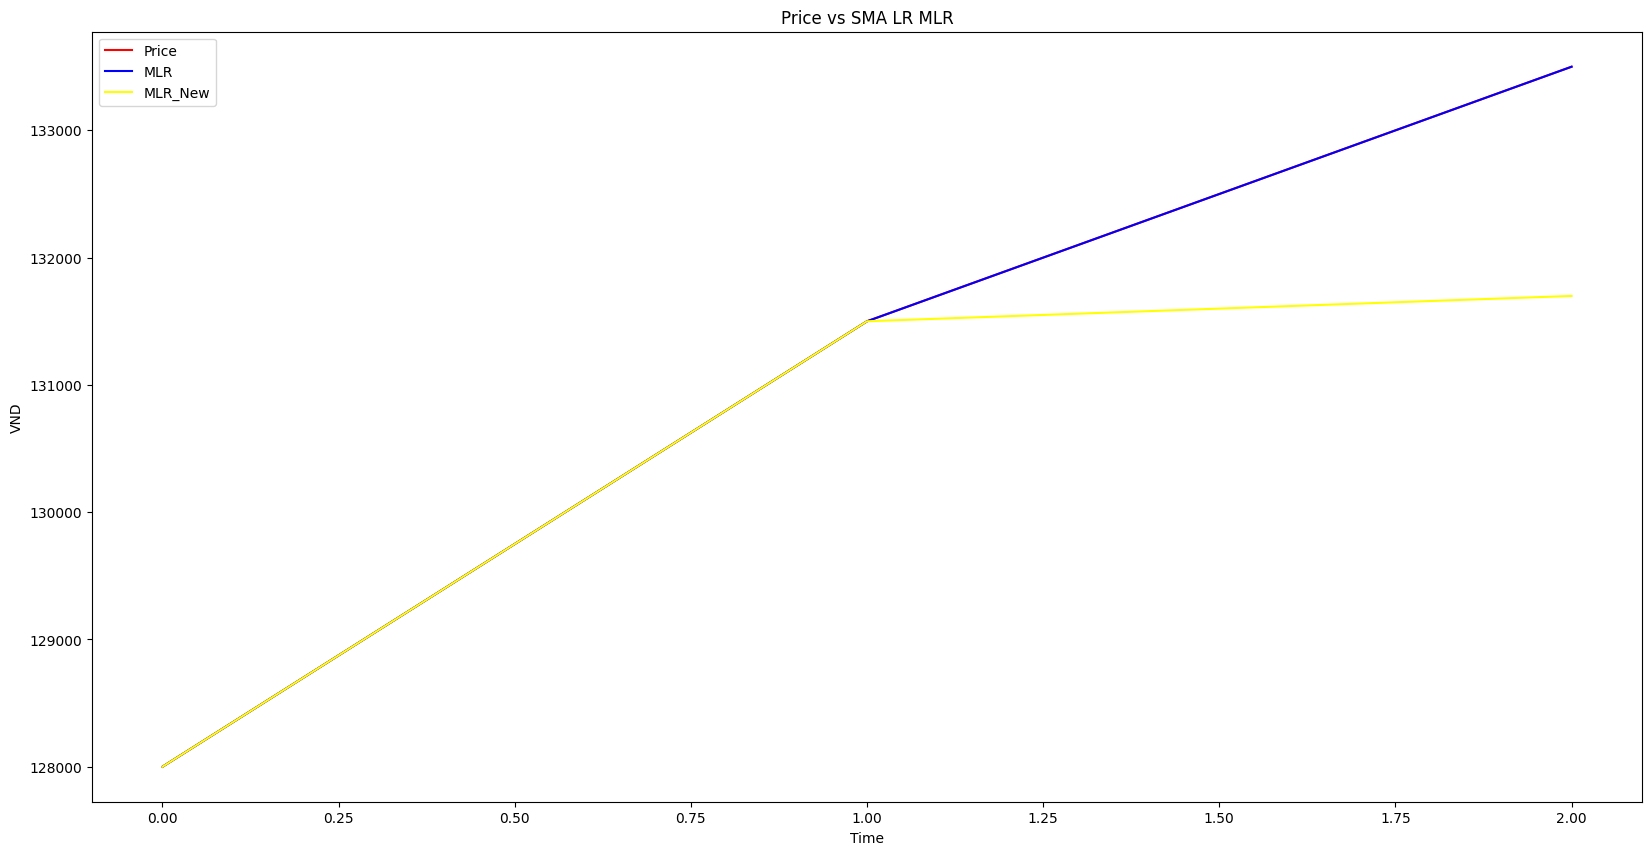

In [58]:
plt.figure(figsize=(20, 10))
plt.plot(df['Price'], color='red', label='Price')
plt.plot(df['MLR'], color='blue', label='MLR')
plt.plot(new_predict, color='yellow', label='MLR_New')
plt.title("Price vs SMA LR MLR")
plt.xlabel("Time")
plt.ylabel("VND")
plt.legend()

In [59]:
# Evluate with R_squared 
# Calculate the R-squared score
from sklearn.metrics import r2_score
r_squared = r2_score(Yhat_test, Y_test)

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [60]:
print(f"R-Squared score: {r_squared}")

R-Squared score: nan


# Team work in 30' (EVALUATE MODEL)

Collect FPT stock data from 18 - 20 of June \
Predict the price with your moel and compare with the real price


# Team work in 1 hour with Ridge Regression

# Decision Trees

In [61]:
# Initialize the model
from sklearn import tree
d_tree = tree.DecisionTreeRegressor()

In [62]:
# Train with X_train and Y_train above
d_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [63]:
Yhat_train = mlr.predict(X_train)
mape = mean_absolute_percentage_error(Y_train, Yhat_train)*100
print(f"Train MAPE of Decision Trees: {mape}")

Train MAPE of Decision Trees: 0.0


In [64]:
# Test the model
Yhat_test = d_tree.predict(X_test)
mape_test = mean_absolute_percentage_error(Y_test, Yhat_test)*100
print(f"Test MAPE of Decision Trees: {mape_test}")

Test MAPE of Decision Trees: 1.4981273408239701


# Team work in 1h 
## Random Forest
